# Digital PID

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [2]:
# Sample time
Ts = 0.002
sTime = 0.1
t = np.arange(0, sTime, Ts)

## Simple step response

In [3]:
# Plant
dt = Ts
num1 = [29870]
den1 = [1, 414.7, 33610]
G = ct.tf(num1, den1)

# Controller
Kp = 3.84808815
Ti = 0.00711849
Td = 0
Gc = ct.tf([Kp*Ti*Td, Kp*Ti, Kp],[Ti, 0])


# Closed-loop system
sys = ct.feedback(Gc*G)

print('G(s):', G)

G(s): 
        2.987e+04
-------------------------
s^2 + 414.7 s + 3.361e+04



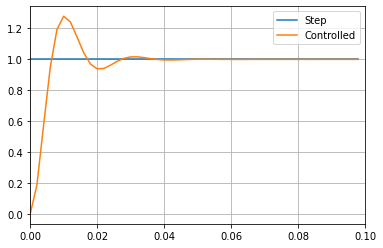

In [4]:
# Step
tsim = sTime

t = np.arange(0, tsim, dt)
R = np.ones(len(t))
plt.plot(t, R, label = "Step")

# Controlled system
t1, C1 = ct.forced_response(sys,t,R)
plt.plot(t1, C1, label = "Controlled");

plt.legend()
plt.xlim((0,tsim))
#plt.ylim((0,1.6))
plt.grid()

## Step-by-step simulation of transfer functions

In [7]:
# Digital PID
b0 = Kp*(1 + (Ts/(2*Ti)) + (Td/Ts))
b1 = -Kp*(1 - (Ts/(2*Ti)) + (2*Td/Ts))
b2 = Kp*Td/Ts
print(f'b0: {b0}, b1: {b1}, b2: {b2}')

b0: 4.388664613547747, b1: -3.307511686452253, b2: 0.0


In [9]:
# Conver to space states to allow initial conditions
Gss = ct.tf2ss(G)

# Initial conditions
xPre = np.zeros(len(G.pole()))

# Accumulated system response
C2 = np.zeros(len(t))

# Accumulated control signal
Uacc = np.zeros(len(t))

# Accumulated error
Eacc = np.zeros(len(t))


for i, ti in enumerate(t):
    # Error
    e = R[i] - C2[i-1]
    
    # Controller
    V = b0*e + b1*Eacc[i-1] + b2*Eacc[i-2] + Uacc[i-1]
    U = V
    
    # PLant response
    _, Ci, Xi = ct.forced_response(Gss, [ti-dt,ti], [U,U], X0 = xPre, return_x = True)
    
    # Save results
    C2[i] = np.squeeze(Ci[-1])
    xPre = np.squeeze(Xi[:,-1])
    Eacc[i] = e
    Uacc[i] = U

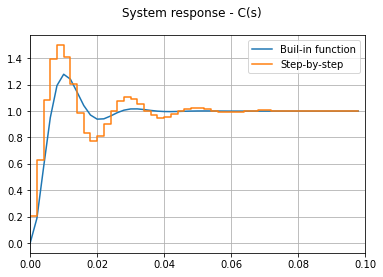

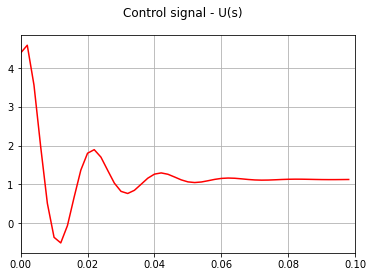

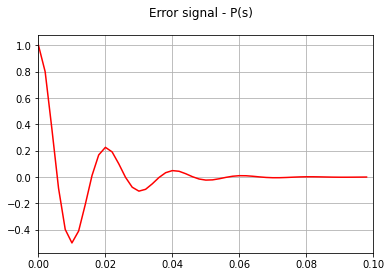

In [11]:
# Compare
plt.plot(t1, C1, label = "Buil-in function" )
plt.step(t, C2, where='post', label = "Step-by-step")
plt.xlim((0,tsim))
plt.suptitle("System response - C(s)")
plt.legend()
plt.grid()

#Controller
plt.figure()
plt.plot(t,Uacc,'r');
plt.xlim((0,tsim))
plt.suptitle("Control signal - U(s)")
plt.grid()

# Integral part
plt.figure()
plt.plot(t,Eacc,'r');
plt.xlim((0,tsim))
plt.suptitle("Error signal - P(s)")
plt.grid()